# Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib import rcParams
plot_w = 13
plot_h = 7
rcParams['figure.figsize'] = plot_w, plot_h
davis_df = pd.read_csv("datasets/Davis.csv")

In [2]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


## Вычисление пропорции мужчин в выборке

In [3]:
def male_proportion(df):
    df.groupby([df.sex == "M"]).count()
    M_count = len(df[df.sex == "M"].index)
    return M_count / len(df.index)
male_proportion(davis_df)

0.44

## Выявление аномалий

Text(0, 0.5, 'weight')

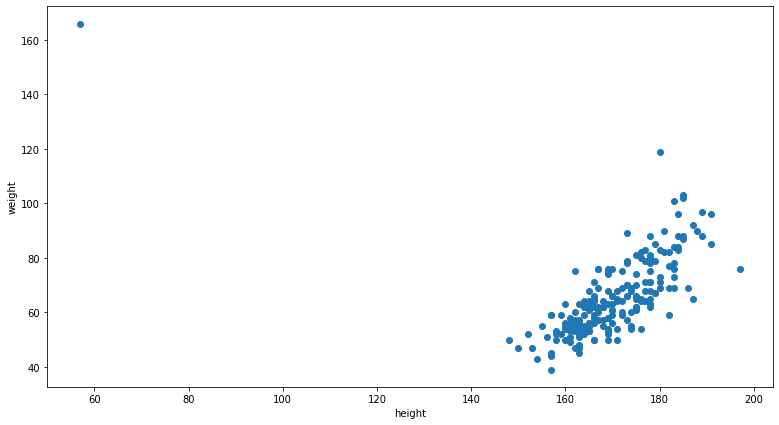

In [4]:
plt.scatter(x=davis_df["height"], y=davis_df["weight"])
plt.xlabel("height")
plt.ylabel("weight")

Text(0, 0.5, 'repwt')

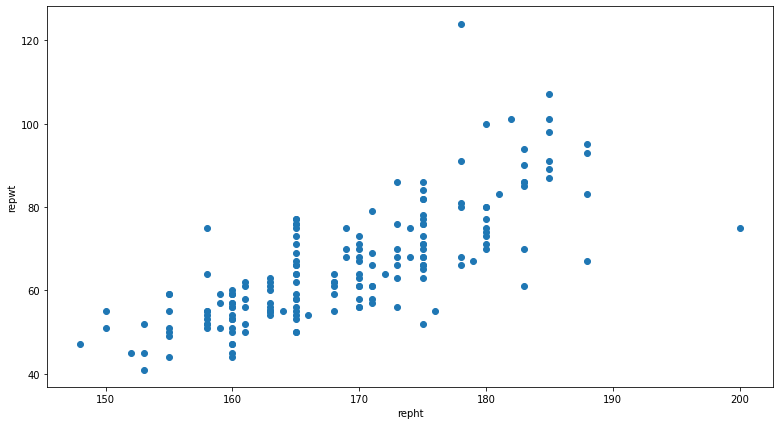

In [5]:
plt.scatter(x=davis_df["repht"], y=davis_df["repwt"])
plt.xlabel("repht")
plt.ylabel("repwt")

Text(0, 0.5, 'weight')

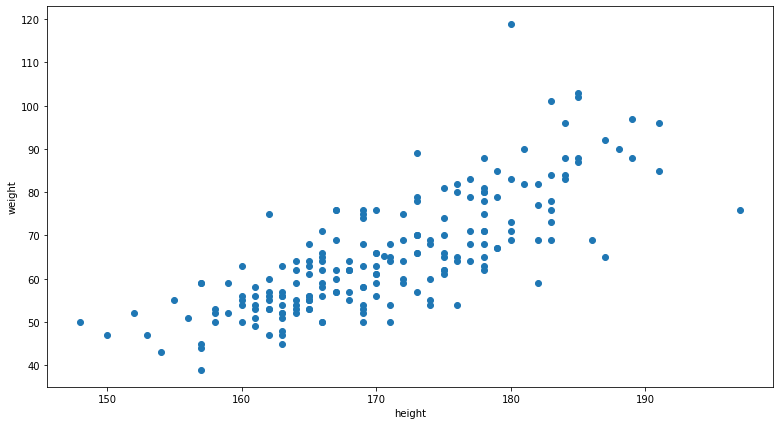

In [6]:
davis_df.where(davis_df["height"] > 100, inplace=True)
davis_df.fillna(davis_df.mean(), inplace=True)
plt.scatter(x=davis_df["height"], y=davis_df["weight"])
plt.xlabel("height")
plt.ylabel("weight")

## Разбиение выборки на 2 с сохранением пропорции:

In [7]:
male_proportion(davis_df)

0.44

In [8]:
male_davis_df = davis_df[davis_df.sex == "M"]
female_davis_df = davis_df[davis_df.sex == "F"]
train_davis_df = male_davis_df.sample(frac=0.5).append(female_davis_df.sample(frac=0.5))
test_davis_df = pd.concat([davis_df, train_davis_df]).drop_duplicates(keep=False)
male_proportion(train_davis_df), male_proportion(test_davis_df)

(0.44, 0.44)

## Отображение train-выборки на в виде точек на графике

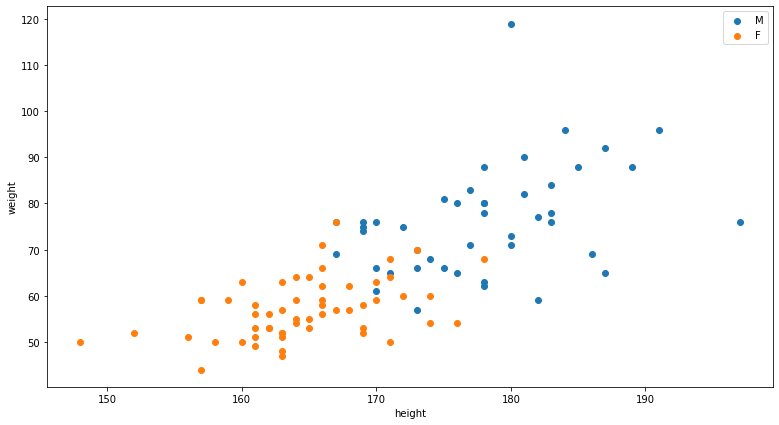

In [9]:
plt.scatter(x=train_davis_df.where(train_davis_df["sex"] == "M")["height"],
            y=train_davis_df.where(train_davis_df["sex"] == "M")["weight"], label="M")
plt.scatter(x=train_davis_df.where(train_davis_df["sex"] == "F")["height"],
            y=train_davis_df.where(train_davis_df["sex"] == "F")["weight"], label="F")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()

## Построение гистограмм роста и веса

### Общая

Text(0.5, 0, 'weight')

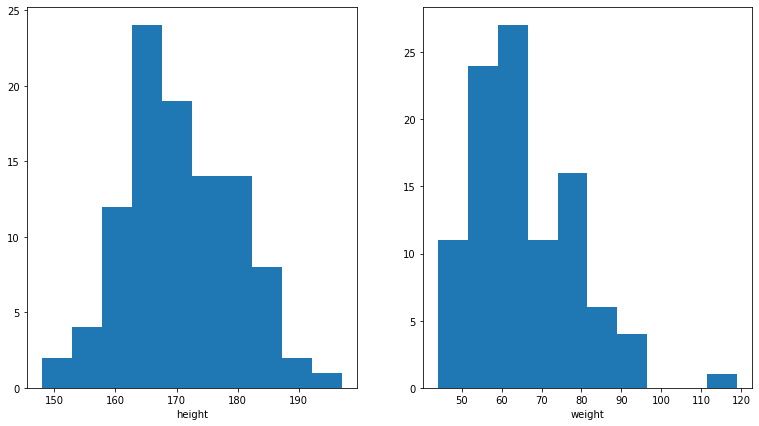

In [10]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(train_davis_df["height"])
ax[0].set_xlabel("height")
ax[1].hist(train_davis_df["weight"])
ax[1].set_xlabel("weight")

### Только мужчины

Text(0.5, 0, 'weight')

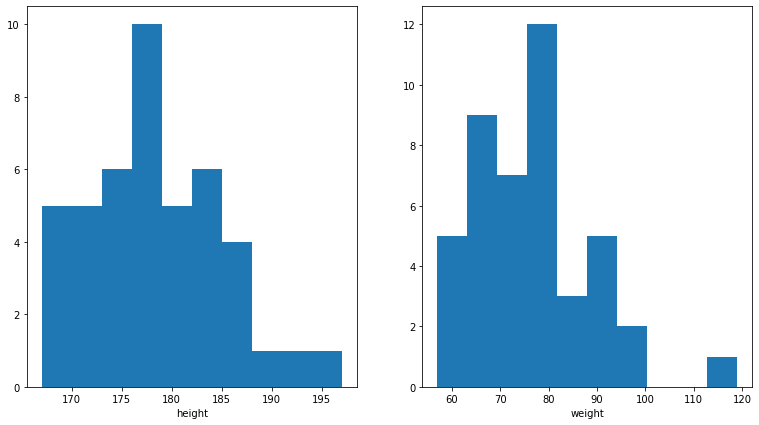

In [11]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(train_davis_df.where(train_davis_df["sex"]=="M")["height"])
ax[0].set_xlabel("height")
ax[1].hist(train_davis_df.where(train_davis_df["sex"]=="M")["weight"])
ax[1].set_xlabel("weight")

### Только женщины

Text(0.5, 0, 'weight')

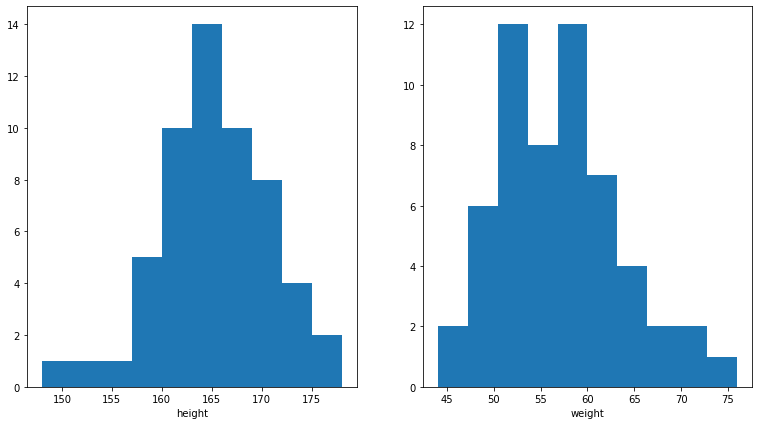

In [12]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(train_davis_df.where(train_davis_df["sex"]=="F")["height"])
ax[0].set_xlabel("height")
ax[1].hist(train_davis_df.where(train_davis_df["sex"]=="F")["weight"])
ax[1].set_xlabel("weight")

## Построение гистограмм величин (repwt - weight) и (repht - height)

### Общая

Text(0.5, 0, 'repht - height')

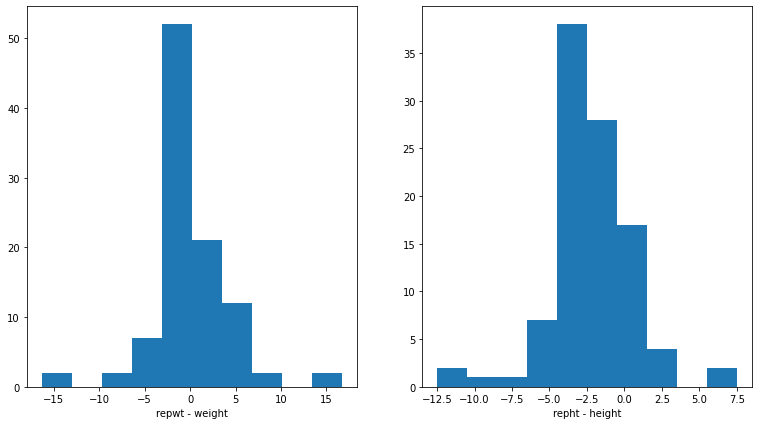

In [13]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(train_davis_df["repwt"] - train_davis_df["weight"])
ax[0].set_xlabel("repwt - weight")
ax[1].hist(train_davis_df["repht"] - train_davis_df["height"])
ax[1].set_xlabel("repht - height")

### Только мужчины

Text(0.5, 0, 'repht - height')

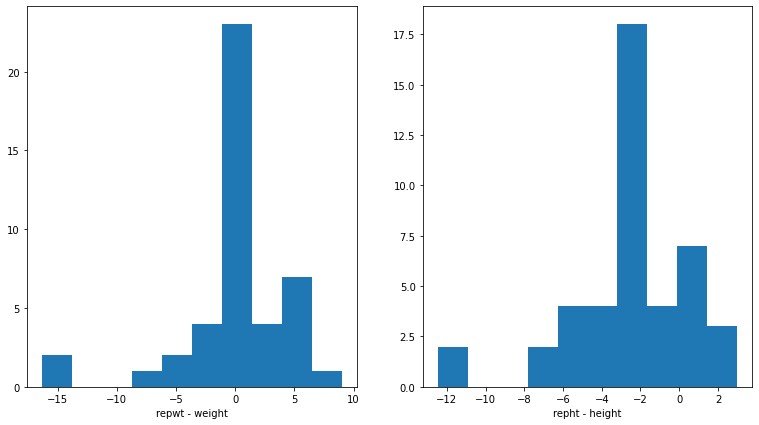

In [14]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(train_davis_df.where(train_davis_df["sex"]=="M")["repwt"] - train_davis_df.where(train_davis_df["sex"]=="M")["weight"])
ax[0].set_xlabel("repwt - weight")
ax[1].hist(train_davis_df.where(train_davis_df["sex"]=="M")["repht"] - train_davis_df.where(train_davis_df["sex"]=="M")["height"])
ax[1].set_xlabel("repht - height")

### Только женщины

Text(0.5, 0, 'repht - height')

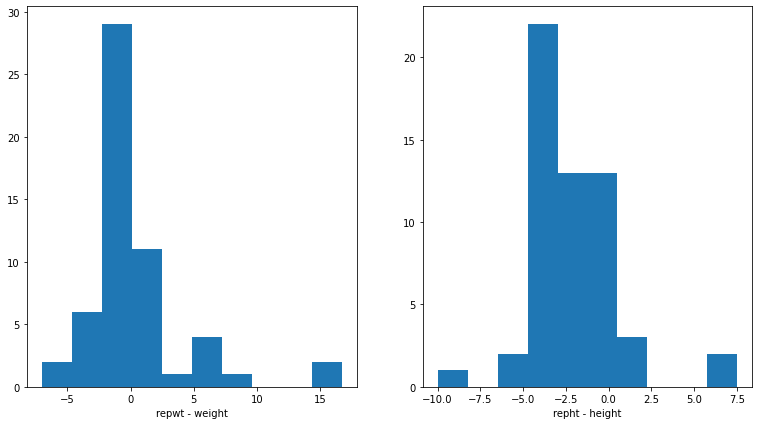

In [15]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(train_davis_df.where(train_davis_df["sex"]=="F")["repwt"] - train_davis_df.where(train_davis_df["sex"]=="F")["weight"])
ax[0].set_xlabel("repwt - weight")
ax[1].hist(train_davis_df.where(train_davis_df["sex"]=="F")["repht"] - train_davis_df.where(train_davis_df["sex"]=="F")["height"])
ax[1].set_xlabel("repht - height")

## Построение генератора

In [16]:
class DataGenerator:
    def __init__(self):
        self.p_woman = None
        self.p_man = None
        self.mean_height = { "woman": None, "man": None }
        self.mean_weight = { "woman": None, "man": None }
        self.cov_matrix = { "woman": None, "man": None }
         
        
    def fit(self, df):
        self.p_man = male_proportion(df) 
        self.p_woman = 1 - self.p_man
        self.mean_height["woman"] = np.mean(df.where(df["sex"] == "F")["height"])
        self.mean_height["man"] = np.mean(df.where(df["sex"] == "M")["height"])
        self.mean_weight["woman"] = np.mean(df.where(df["sex"] == "F")["weight"])
        self.mean_weight["man"] = np.mean(df.where(df["sex"] == "M")["weight"])
        self.cov_matrix["woman"] = np.cov(df[df["sex"] == "F"]["height"].to_numpy(),
                                          df[df["sex"] == "F"]["weight"].to_numpy())
        self.cov_matrix["man"] = np.cov(df[df["sex"] == "M"]["height"].to_numpy(),
                                        df[df["sex"] == "M"]["weight"].to_numpy())
        return self
    
    
    def generate_points(self, n_points):
        result = []
        for i in range(n_points):
            sex = scipy.stats.distributions.bernoulli.rvs(self.p_woman)
            if(sex == 0):
                hw = np.random.multivariate_normal(mean=[self.mean_height["man"], self.mean_weight["man"]],
                                                   cov=self.cov_matrix["man"], size=1)
                result.append(np.array([sex, hw[:, 0][0], hw[:, 1][0]]))
            else:
                hw = np.random.multivariate_normal(mean=[self.mean_height["woman"], self.mean_weight["woman"]],
                                                   cov=self.cov_matrix["woman"], size=1)
                result.append(np.array([sex, hw[:, 0][0], hw[:, 1][0]]))
        return np.array(result, dtype=float)
    
    
    def log_likehood(self, df, sex):
        x = df[["height", "weight"]].values
        if sex == "M":
            mean_height = self.mean_height["man"]
            mean_weight = self.mean_weight["man"]
            cov_matrix = self.cov_matrix["man"]
            p = self.p_man
        else:
            mean_height = self.mean_height["woman"]
            mean_weight = self.mean_weight["woman"]
            cov_matrix = self.cov_matrix["woman"]
            p = self.p_woman
        result = p * scipy.stats.multivariate_normal.pdf(x=x, mean=[mean_height, mean_weight], cov=cov_matrix)
        return np.log(result)
    
    
    def mean_log_likehood(self, df, sex):
        return self.log_likehood(df, sex).sum() / len(df.index)

In [17]:
generator = DataGenerator()
generator.fit(train_davis_df)
generated_data = generator.generate_points(100)
generated_data

array([[  0.        , 175.91593647,  84.60476882],
       [  1.        , 175.51232688,  63.21824599],
       [  0.        , 179.10505615,  68.67585952],
       [  1.        , 162.60526278,  55.06439924],
       [  0.        , 185.13243306,  86.43165719],
       [  1.        , 168.57583822,  64.45800462],
       [  1.        , 167.65917138,  48.54503201],
       [  1.        , 165.57886553,  57.37577854],
       [  0.        , 165.88096437,  52.47696512],
       [  1.        , 167.52648353,  50.46165563],
       [  0.        , 167.62562161,  75.69573403],
       [  1.        , 161.6671485 ,  64.88797091],
       [  1.        , 165.19519027,  47.03542726],
       [  1.        , 157.77219097,  52.59963239],
       [  1.        , 163.04000208,  59.90426928],
       [  1.        , 164.43519507,  51.63298049],
       [  1.        , 170.62942364,  63.63375366],
       [  0.        , 179.37940908,  78.87102024],
       [  0.        , 172.73682814,  78.11519704],
       [  0.        , 192.43627

In [18]:
generated_df = pd.DataFrame( {"sex" : generated_data.T[0], "height" : generated_data.T[1], "weight" : generated_data.T[2]})
generated_df["sex"][generated_df["sex"] == 1] = "F"
generated_df["sex"][generated_df["sex"] == 0] = "M"
generated_df

,sex,height,weight
0,M,175.915936,84.604769
1,F,175.512327,63.218246
2,M,179.105056,68.675860
3,F,162.605263,55.064399
4,M,185.132433,86.431657
...,...,...,...
95,F,165.923433,54.288627
96,M,180.329889,82.113701
97,M,189.627976,85.606232
98,M,183.940699,84.554291


In [19]:
generator.mean_log_likehood(train_davis_df, "F")

-9.708061008985736

In [20]:
generator.mean_log_likehood(test_davis_df, "M")

-8.89553614689324

In [21]:
generator.mean_log_likehood(generated_df, "F")

-9.824325029668362

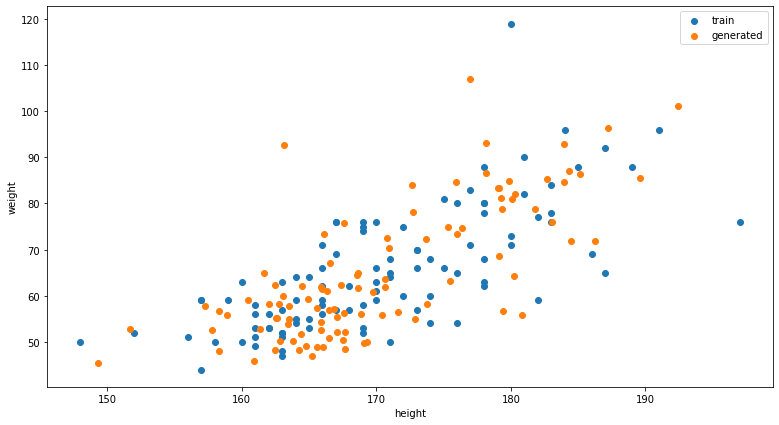

In [22]:
plt.scatter(x=train_davis_df["height"], y=train_davis_df["weight"], label="train")
plt.scatter(x=generated_data.T[1], y=generated_data.T[2], label="generated")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()

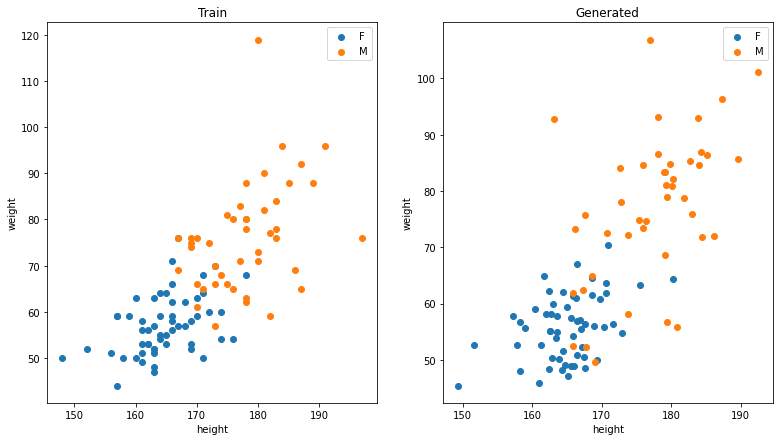

In [23]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(x=train_davis_df.where(train_davis_df["sex"] == "F")["height"],
              y=train_davis_df.where(train_davis_df["sex"] == "F")["weight"], label="F")
ax[0].scatter(x=train_davis_df.where(train_davis_df["sex"] == "M")["height"],
              y=train_davis_df.where(train_davis_df["sex"] == "M")["weight"], label="M")
ax[0].set_xlabel("height")
ax[0].set_ylabel("weight")
ax[0].set_title("Train")
ax[0].legend()
x_f = []
x_m = []
y_f = []
y_m = []
for i in range(len(generated_data)):
    if(generated_data[i][0] == 1):
        x_f.append(generated_data[i][1])
        y_f.append(generated_data[i][2])
    else:
        x_m.append(generated_data[i][1])
        y_m.append(generated_data[i][2])
ax[1].scatter(x=x_f, y=y_f, label="F")
ax[1].scatter(x=x_m, y=y_m, label="M")
ax[1].set_xlabel("height")
ax[1].set_ylabel("weight")
ax[1].set_title("Generated")
ax[1].legend()

# Задание 2

## a)Обучение линейной модели градиентным спуском

### Улучшение параметров (w1, b)

In [24]:
def param_upgrade(df, w1, b, alpha):
    N = len(df.index)
    dQ_dw1 = 0
    dQ_db = 0
    x = df["height"].to_numpy()
    y = df["weight"].to_numpy()
    
    
    for i in range(N):
        dQ_dw1 += (-2 * x[i] * (y[i] - w1 * x[i] - b) / N)
        dQ_db += (-2 * (y[i] - w1 * x[i] - b) / N )
        
        
    w1 = w1 - alpha * dQ_dw1
    b = b - alpha * dQ_db
    return w1, b

In [25]:
param_upgrade(train_davis_df, 0, 0, 0.001)

(22.497679999999995, 0.13094000000000006)

### Подсчет среднеквадратической ошибки

In [26]:
def squared_error_loss(df, w1, b):
    N = len(df.index)
    error = 0
    x = df["height"].to_numpy()
    y = df["weight"].to_numpy()
    for i in range(N):
        error += (y[i] - w1 * x[i] - b) ** 2
    return error / N  

### Градиентный спуск

In [27]:
def gradient_descent(df, epoches_N, alpha):   
    w1 = -1
    b = -1
    w1_history = []
    b_history = []
    loss_history = []
    for i in range(epoches_N):
        w1, b = param_upgrade(df, w1, b, alpha)
        w1_history.append(w1)
        b_history.append(b)
        if i % 200 == 0:
            print(f"Loss in {i} epoch:" + str(squared_error_loss(df, w1, b)))
        loss_history.append(squared_error_loss(df, w1, b))
    return w1, b, w1_history, b_history, loss_history        

In [28]:
w1, b, w1_history, b_history, loss_history = gradient_descent(train_davis_df, 1000, 1e-3)

Loss in 0 epoch:185533774.96591905
Loss in 200 epoch:nan


<ipython-input-26-dbb66dd7cb54>:7: RuntimeWarning: overflow encountered in double_scalars
  error += (y[i] - w1 * x[i] - b) ** 2
<ipython-input-24-807c16274594>:10: RuntimeWarning: overflow encountered in double_scalars
  dQ_dw1 += (-2 * x[i] * (y[i] - w1 * x[i] - b) / N)
<ipython-input-24-807c16274594>:14: RuntimeWarning: invalid value encountered in double_scalars
  w1 = w1 - alpha * dQ_dw1


Loss in 400 epoch:nan
Loss in 600 epoch:nan
Loss in 800 epoch:nan


In [29]:
w1, b

(nan, nan)

In [30]:
w1_history

[80.15640000000002,
 -4571.701811291202,
 262071.2963874483,
 -15021818.538960377,
 861045770.2609094,
 -49354863164.806496,
 2829004686272.9253,
 -162157627469532.34,
 9294822406672614.0,
 -5.3277619387848646e+17,
 3.0538557956726e+19,
 -1.7504601984694102e+21,
 1.0033580861177194e+23,
 -5.751215879447522e+24,
 3.296578215658954e+26,
 -1.8895878992810699e+28,
 1.0831056312115228e+30,
 -6.208326211278369e+31,
 3.5585923694748834e+33,
 -2.039773559108341e+35,
 1.1691915624074328e+37,
 -6.7017679658633465e+38,
 3.841431576515339e+40,
 -2.2018960716357926e+42,
 1.262119658703695e+44,
 -7.234428788016908e+45,
 4.146751025385527e+47,
 -2.376904185582501e+49,
 1.3624337397768766e+51,
 -7.809425834417923e+52,
 4.4763374601440706e+54,
 -2.565822056825074e+56,
 1.470720848440716e+58,
 -8.430124015360144e+59,
 4.83211963641491e+61,
 -2.7697552418069647e+63,
 1.5876146860488147e+65,
 -9.100155686368552e+66,
 5.216179608557716e+68,
 -2.989897167307806e+70,
 1.7137993209453592e+72,
 -9.823441904918

In [31]:
b_history

[-0.5260199999999999,
 -27.730566616,
 1531.589020239983,
 -87848.13813777581,
 5035368.683605548,
 -288625751.4126022,
 16543934033.94677,
 -948292912040.5084,
 54355840945993.02,
 -3115659104307526.5,
 1.785885653742201e+17,
 -1.023663841731836e+19,
 5.8676078094552393e+20,
 -3.3632936909575062e+22,
 1.9278289924910273e+24,
 -1.1050253013232692e+26,
 6.333969046636096e+27,
 -3.6306104335983484e+29,
 2.0810540789670648e+31,
 -1.1928534219776226e+33,
 6.8373969744697195e+34,
 -3.919173682629101e+36,
 2.246457593725396e+38,
 -1.287662178069412e+40,
 7.38083767733538e+41,
 -4.2306721240232756e+43,
 2.4250074860675333e+45,
 -1.390006394986526e+47,
 7.967471396290904e+48,
 -4.566928661600077e+50,
 2.617748638527119e+52,
 -1.5004849959950347e+54,
 8.600731139995928e+55,
 -4.929911084745056e+57,
 2.825808981572667e+59,
 -1.619744507166846e+61,
 9.284322774843225e+62,
 -5.321743584007942e+64,
 3.0504060943107322e+66,
 -1.7484828408813029e+68,
 1.002224671186659e+70,
 -5.744719181967624e+71,
 

### Нормализируем данные

In [32]:
def normalize(df):
    df = df.copy()
    df["height"] = (df["height"] - df["height"].mean()) / df["height"].std()
    df["weight"] = (df["weight"] - df["weight"].mean()) / df["weight"].std() 
    return df 
normalize(train_davis_df)

,Unnamed: 0,sex,weight,height,repwt,repht
180,181.0,M,1.102255,0.602979,78.0,175.0
58,59.0,M,0.722952,0.162848,70.0,169.0
7,8.0,M,0.267788,1.703306,73.0,180.0
20,21.0,M,4.060821,1.043110,124.0,178.0
16,17.0,M,2.012583,1.813338,101.0,185.0
...,...,...,...,...,...,...
130,131.0,F,-0.263237,-0.497348,61.0,163.0
2,3.0,F,-0.945982,-1.047511,54.0,158.0
114,115.0,F,0.798813,-0.387315,77.0,165.0
150,151.0,F,-0.642540,-0.277282,58.0,165.0


In [33]:
w1, b, w1_history, b_history, loss_history = gradient_descent(normalize(train_davis_df), 10000, 0.001)

Loss in 0 epoch:4.381746843730774
Loss in 200 epoch:2.2437755459764457
Loss in 400 epoch:1.2781501851201484
Loss in 600 epoch:0.8420153661158364
Loss in 800 epoch:0.6450281059015903
Loss in 1000 epoch:0.556054584031295
Loss in 1200 epoch:0.515867299219344
Loss in 1400 epoch:0.4977154126893398
Loss in 1600 epoch:0.48951642809268087
Loss in 1800 epoch:0.485813003116897
Loss in 2000 epoch:0.48414017165170625
Loss in 2200 epoch:0.48338454727086644
Loss in 2400 epoch:0.4830432248237285
Loss in 2600 epoch:0.4828890445428256
Loss in 2800 epoch:0.4828193982688696
Loss in 3000 epoch:0.48278793730730607
Loss in 3200 epoch:0.4827737254405441
Loss in 3400 epoch:0.4827673054369551
Loss in 3600 epoch:0.4827644052606388
Loss in 3800 epoch:0.4827630951182497
Loss in 4000 epoch:0.48276250326022696
Loss in 4200 epoch:0.4827622358847923
Loss in 4400 epoch:0.4827621150949629
Loss in 4600 epoch:0.48276206052619913
Loss in 4800 epoch:0.4827620358735998
Loss in 5000 epoch:0.48276202473614
Loss in 5200 epoch:

In [34]:
w1, b

(0.7157943799605946, -2.020285207711607e-09)

In [35]:
w1_history

[-0.9966027271192917,
 -0.9932121808388871,
 -0.9898283478401178,
 -0.986451214830686,
 -0.9830807685446129,
 -0.9797169957421862,
 -0.9763598832099083,
 -0.9730094177604444,
 -0.9696655862325703,
 -0.9663283754911214,
 -0.9629977724269406,
 -0.9596737639568269,
 -0.956356337023484,
 -0.9530454785954692,
 -0.9497411756671418,
 -0.9464434152586124,
 -0.943152184415692,
 -0.9398674702098406,
 -0.9365892597381168,
 -0.933317540123127,
 -0.9300522985129748,
 -0.9267935220812107,
 -0.9235411980267815,
 -0.9202953135739801,
 -0.9170558559723953,
 -0.9138228124968615,
 -0.9105961704474094,
 -0.9073759171492152,
 -0.9041620399525514,
 -0.900954526232737,
 -0.8977533633900878,
 -0.894558538849867,
 -0.891370040062236,
 -0.8881878545022044,
 -0.8850119696695816,
 -0.8818423730889274,
 -0.8786790523095029,
 -0.8755219949052218,
 -0.872371188474601,
 -0.869226620640713,
 -0.8660882790511361,
 -0.8629561513779065,
 -0.8598302253174699,
 -0.8567104885906329,
 -0.8535969289425152,
 -0.850489534142500

In [36]:
b_history

[-0.998,
 -0.996004,
 -0.994011992,
 -0.992023968016,
 -0.990039920079968,
 -0.9880598402398081,
 -0.9860837205593285,
 -0.9841115531182099,
 -0.9821433300119734,
 -0.9801790433519495,
 -0.9782186852652456,
 -0.976262247894715,
 -0.9743097233989256,
 -0.9723611039521278,
 -0.9704163817442236,
 -0.9684755489807352,
 -0.9665385978827737,
 -0.9646055206870082,
 -0.9626763096456342,
 -0.9607509570263429,
 -0.9588294551122902,
 -0.9569117962020657,
 -0.9549979726096616,
 -0.9530879766644422,
 -0.9511818007111134,
 -0.9492794371096911,
 -0.9473808782354717,
 -0.9454861164790007,
 -0.9435951442460427,
 -0.9417079539575507,
 -0.9398245380496356,
 -0.9379448889735363,
 -0.9360689991955893,
 -0.9341968611971981,
 -0.9323284674748037,
 -0.930463810539854,
 -0.9286028829187744,
 -0.9267456771529368,
 -0.9248921857986309,
 -0.9230424014270336,
 -0.9211963166241796,
 -0.9193539239909312,
 -0.9175152161429493,
 -0.9156801857106633,
 -0.913848825339242,
 -0.9120211276885636,
 -0.9101970854331864,
 -0.

In [37]:
loss_history

[4.381746843730774,
 4.366282388513244,
 4.350879270795997,
 4.335537247288099,
 4.320256075663616,
 4.30503551455783,
 4.289875323563372,
 4.27477526322647,
 4.259735095043133,
 4.2447545814554,
 4.229833485847598,
 4.2149715725425745,
 4.200168606797995,
 4.185424354802647,
 4.170738583672707,
 4.156111061448102,
 4.141541557088832,
 4.127029840471301,
 4.112575682384727,
 4.098178854527461,
 4.083839129503431,
 4.069556280818539,
 4.0553300828770595,
 4.041160310978099,
 4.027046741312047,
 4.012989150957025,
 3.998987317875376,
 3.9850410209101663,
 3.9711500397816666,
 3.9573141550838984,
 3.9435331482811438,
 3.9298068017045193,
 3.9161348985485227,
 3.9025172228675995,
 3.888953559572763,
 3.8754436944281587,
 3.8619874140477,
 3.8485845058917105,
 3.835234758263536,
 3.8219379603062196,
 3.808693901999174,
 3.7955023741548564,
 3.7823631684154595,
 3.769276077249628,
 3.756240893949183,
 3.7432574126258493,
 3.730325428208013,
 3.7174447364374608,
 3.704615133866186,
 3.6918364

In [38]:
def predict(x, w1, b):
    return w1*x + b

Text(0, 0.5, 'weight')

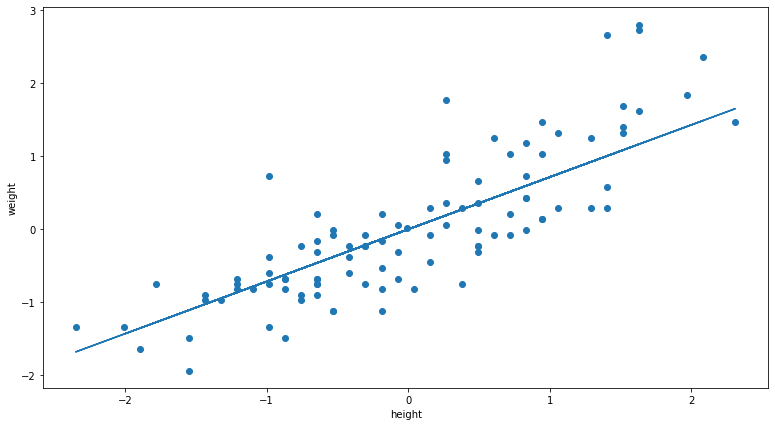

In [39]:
norm_test_df = normalize(test_davis_df)
x = norm_test_df["height"]
y = norm_test_df["weight"]
plt.scatter(x, y)
plt.plot(x, predict(x, w1, b))
plt.xlabel("height")
plt.ylabel("weight")

### Визуализация

Text(0, 0.5, 'w1')

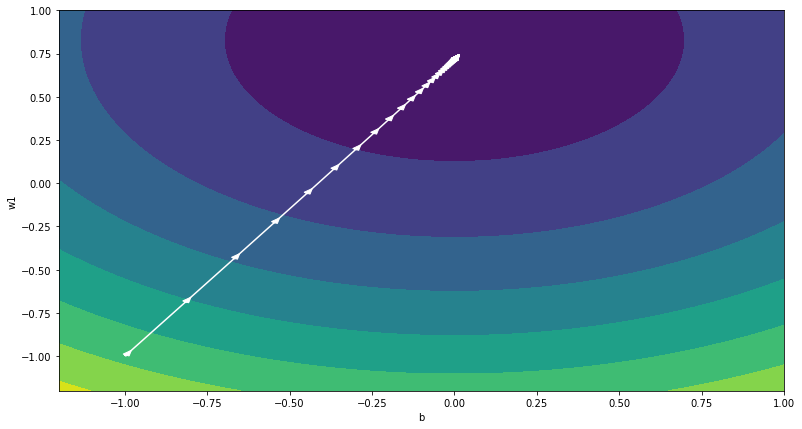

In [41]:
x = np.linspace(-1.2, 1, 100)
y = np.linspace(-1.2, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros(shape=(x.size, y.size))
for i in range(len(x)):
    for j in range(len(y)):
        loss = squared_error_loss(norm_test_df, x[i], y[j])
        Z[i, j] = loss
plt.contourf(X, Y, Z)
plt.plot(b_history, w1_history, color="WHITE")
for i in range(len(b_history)):
    if i % 100 == 0:
        plt.arrow(b_history[i], w1_history[i], b_history[i + 1] - b_history[i], w1_history[i + 1] - w1_history[i],
                  width=0.007, color="WHITE")
plt.xlabel("b")
plt.ylabel("w1")

## б)Обучение линейной модели градиентным спуском

In [42]:
def sex_converter(df):
    converted_df = df.copy()
    converted_df["sex"] = (converted_df["sex"] == "M").values.astype(int)
    return converted_df

In [43]:
sex_converter(train_davis_df)

,Unnamed: 0,sex,weight,height,repwt,repht
180,181.0,1,80.0,176.0,78.0,175.0
58,59.0,1,75.0,172.0,70.0,169.0
7,8.0,1,69.0,186.0,73.0,180.0
20,21.0,1,119.0,180.0,124.0,178.0
16,17.0,1,92.0,187.0,101.0,185.0
...,...,...,...,...,...,...
130,131.0,0,62.0,166.0,61.0,163.0
2,3.0,0,53.0,161.0,54.0,158.0
114,115.0,0,76.0,167.0,77.0,165.0
150,151.0,0,57.0,168.0,58.0,165.0


In [44]:
def param_upgrade(df, w1, w2, b, alpha):
    df = sex_converter(df)
    N = len(df.index)
    dQ_dw1 = 0
    dQ_dw2 = 0
    dQ_db = 0
    x1 = df["height"].to_numpy()
    x2 = df["sex"].to_numpy()
    y = df["weight"].to_numpy()
    
    for i in range(N):
        dQ_dw1 += (-2 * x1[i] * (y[i] - w1 * x1[i] - w2 * x2[i] - b) / N)
        dQ_dw2 += (-2 * x2[i] * (y[i] - w1 * x1[i] - w2 * x2[i] - b) / N)
        dQ_db += (-2 * (y[i] - w1 * x1[i] - w2 * x2[i] - b) / N )
        
        
    w1 = w1 - alpha * dQ_dw1
    w2 = w2 - alpha * dQ_dw2
    b = b - alpha * dQ_db
    return w1, w2, b

### Подсчет среднеквадратической ошибки

In [45]:
def squared_error_loss(df, w1, w2, b):
    df = sex_converter(df)
    N = len(df.index)
    error = 0
    x1 = df["height"].to_numpy()
    x2 = df["sex"].to_numpy()
    y = df["weight"].to_numpy()
    for i in range(N):
        error += (y[i] - w1 * x1[i] - w2 * x2[i] - b) ** 2
    return error / N  

In [46]:
def predict(x1, x2, w1, w2, b):
    return w1 * x1 + w2 * x2 + b;

In [47]:
def gradient_descent_2(df, epoches_N, alpha):   
    w1 = -1
    w2 = -1
    b = -1
    w1_history = []
    w2_history = []
    b_history = []
    loss_history = []
    for i in range(epoches_N):
        w1, w2, b = param_upgrade(df, w1, w2, b, alpha)
        w1_history.append(w1)
        w2_history.append(w2)
        b_history.append(b)
        if i % 200 == 0:
            print(f"Loss in {i} epoch:" + str(squared_error_loss(df, w1, w2, b)))
        loss_history.append(squared_error_loss(df, w1, w2, b))
    return w1, w2, b, w1_history, w2_history, b_history, loss_history        

In [48]:
w1, w2, b, w1_history, w2_history, b_history, loss_history = gradient_descent_2(normalize(train_davis_df), 10000, 0.001)

Loss in 0 epoch:7.118159562812968
Loss in 200 epoch:2.7666231643748413
Loss in 400 epoch:1.259985393491075
Loss in 600 epoch:0.7337241040961683
Loss in 800 epoch:0.5472212282982131
Loss in 1000 epoch:0.47935436813588495
Loss in 1200 epoch:0.4533438375122197
Loss in 1400 epoch:0.44232587062701917
Loss in 1600 epoch:0.4368093314509197
Loss in 1800 epoch:0.4333985670360881
Loss in 2000 epoch:0.4308583407581935
Loss in 2200 epoch:0.4287287152735575
Loss in 2400 epoch:0.4268322361587543
Loss in 2600 epoch:0.42509629849395153
Loss in 2800 epoch:0.4234881281983226
Loss in 3000 epoch:0.4219905563398953
Loss in 3200 epoch:0.4205928080905386
Loss in 3400 epoch:0.41928691888500075
Loss in 3600 epoch:0.4180663017534338
Loss in 3800 epoch:0.41692515456499885
Loss in 4000 epoch:0.4158582025552054
Loss in 4200 epoch:0.41486057787351227
Loss in 4400 epoch:0.41392775662312475
Loss in 4600 epoch:0.4130555208395307
Loss in 4800 epoch:0.41223993181700685
Loss in 5000 epoch:0.41147730899433216
Loss in 5200

In [49]:
w1, w2, b

(0.4579344752208777, 0.7172020340403231, -0.3102260864716814)

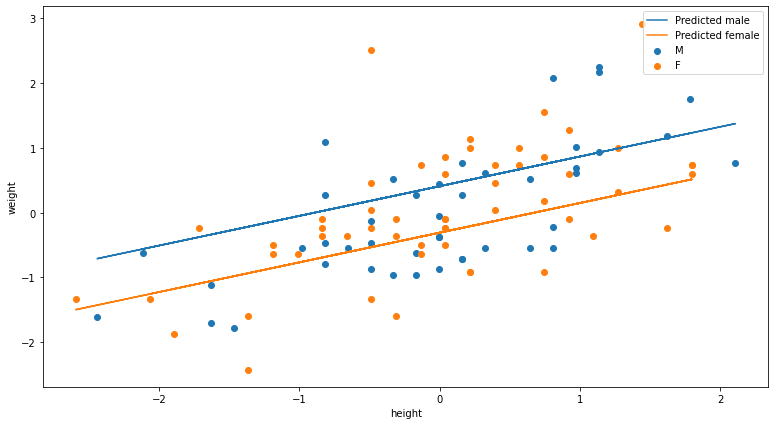

In [55]:
norm_test_df_male = normalize(test_davis_df[test_davis_df["sex"] == "M"])
norm_test_df_female = normalize(test_davis_df[test_davis_df["sex"] == "F"])
x1_male = norm_test_df_male["height"]
x1_female = norm_test_df_female["height"]
x2_male = 1
x2_female = 0
y_male = norm_test_df_male["weight"]
y_female = norm_test_df_female["weight"]
plt.scatter(x1_male, y_male, label="M")
plt.scatter(x1_female, y_female, label="F")
plt.plot(x1_male, predict(x1_male, x2_male, w1, w2, b), label="Predicted male")
plt.plot(x1_female, predict(x1_female, x2_female, w1, w2, b), label="Predicted female")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()